### 比较不同hidden-size对结果的影响
#### 我们选择hidden-size=2,3,4来呈现结果
### 1.hidden-size=4（原结果）

In [9]:
%%time
class LSTMRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2,bidirectional=True):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,batch_first=True,bidirectional=True)
        self.linear = nn.Linear(2*hidden_size, output_size)
    
    def forward(self, x):
        x, _ = self.lstm(x) # (seq, batch, hidden)
        s, b, h = x.shape
#         print(s,b)
        x = x.contiguous().view(s*b, h) # 转换成线性层的输入格式
        x = self.linear(x)
        x = x.view(s, b, -1)
        return x



torch.manual_seed(7) #cpu
torch.cuda.manual_seed(7) #gpu
 
np.random.seed(7) #numpy
random.seed(7) # random and transforms
torch.backends.cudnn.deterministic=True #cudnn

model = LSTMRegression(input_size=240, hidden_size=4, output_size=1)

criterion = torch.nn.BCEWithLogitsLoss()     #交叉熵BCEWithLogitsLoss()和MultiLabelSoftMarginLoss()
#criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.SGD(model.parameters(), lr=1e-1)

epochs = 100
batch_size = 40
batch = X_train.shape[0] // batch_size

torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  #
    num_workers=2,  # 多线程来读数据
)

loss_epoch = np.zeros(epochs)
acc_epoch = np.zeros(epochs)
for epoch in range(epochs):
    acc_epo = 0
    loss_ep = np.array([])
    acc_ep = np.array([])
    for step,(var_x,var_y) in enumerate(loader):
        out = model(var_x)
        out_f = out.detach().clone().numpy()
        var_yf = var_y.detach().clone().numpy()
        loss = criterion(out, var_y)
        loss_f = loss.detach().clone().numpy()
        acc_ep = np.append(acc_ep,acc(out_f,var_yf))
        loss_ep = np.append(loss_ep,loss_f)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        #print(f'Epoch: {epoch:5d}, Loss: {loss.item():.4e}, Acc:{acc_epo/(X_train.shape[0]*X_train.shape[1]):.4e}')
        print(f'Epoch: {epoch:5d}, Loss: {np.mean(loss_ep):.4e}, ACC: {np.mean(acc_ep):.5e}')
        
    loss_epoch[epoch] = np.mean(loss_ep)
    acc_epoch[epoch] = np.mean(acc_ep)

<timed exec>:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch:     9, Loss: 6.9120e-01, ACC: 4.68549e-01
Epoch:    19, Loss: 6.9090e-01, ACC: 4.67736e-01
Epoch:    29, Loss: 6.9056e-01, ACC: 4.69262e-01
Epoch:    39, Loss: 6.9021e-01, ACC: 4.66525e-01
Epoch:    49, Loss: 6.9012e-01, ACC: 4.67440e-01
Epoch:    59, Loss: 6.9016e-01, ACC: 4.69403e-01
Epoch:    69, Loss: 6.8937e-01, ACC: 4.66781e-01
Epoch:    79, Loss: 6.8915e-01, ACC: 4.65739e-01
Epoch:    89, Loss: 6.8924e-01, ACC: 4.68045e-01
Epoch:    99, Loss: 6.8855e-01, ACC: 4.66633e-01
Wall time: 22min 26s


In [10]:
np.zeros(9)

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
# test
X_valid = X_valid.reshape(-1,198,240)
#X_valid = torch.from_numpy(X_valid)
Y_pred = model(X_valid)

kind = 3
Y_pred = torch.squeeze(Y_pred,2)
Y_pred = Y_pred.clone().detach().numpy()
pred_acc = acc(Y_pred,Y_valid)

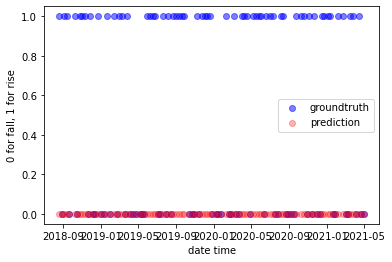

In [12]:
Y_pred_re = Y_pred[:,kind]
Y_pred_re[Y_pred_re>0] = 1
Y_pred_re[Y_pred_re<=0] = 0
k = len(Y_pred_re)
series = np.arange(1,k,k//100)

fig = plt.figure()
ax = plt.subplot()
type1 = ax.scatter(index_valid[series], Y_valid[series,kind], alpha=0.5,color='b',label='groundtruth') 
type2 = ax.scatter(index_valid[series], Y_pred_re[series], alpha=0.3,color='r',label='prediction') 
plt.xlabel("date time")
plt.ylabel("0 for fall, 1 for rise")
ax.legend((type1, type2), (u'groundtruth', u'prediction'), loc='best')
plt.show()

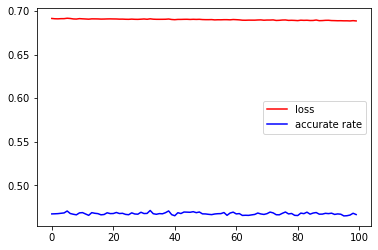

In [13]:
plt.plot(loss_epoch, 'r-', label='loss')
plt.plot(acc_epoch, 'b-', label='accurate rate')
plt.legend(loc='best')
plt.show()

In [16]:
model = LSTMRegression(input_size=240, hidden_size=2, output_size=1)

criterion = torch.nn.BCEWithLogitsLoss()     #交叉熵BCEWithLogitsLoss()和MultiLabelSoftMarginLoss()
#criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.SGD(model.parameters(), lr=1e-1)

epochs = 100
batch_size = 40
batch = X_train.shape[0] // batch_size

torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  #
    num_workers=2,  # 多线程来读数据
)

loss_epoch = np.zeros(epochs)
acc_epoch = np.zeros(epochs)
for epoch in range(epochs):
    acc_epo = 0
    loss_ep = np.array([])
    acc_ep = np.array([])
    for step,(var_x,var_y) in enumerate(loader):
        out = model(var_x)
        out_f = out.detach().clone().numpy()
        var_yf = var_y.detach().clone().numpy()
        loss = criterion(out, var_y)
        loss_f = loss.detach().clone().numpy()
        acc_ep = np.append(acc_ep,acc(out_f,var_yf))
        loss_ep = np.append(loss_ep,loss_f)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        #print(f'Epoch: {epoch:5d}, Loss: {loss.item():.4e}, Acc:{acc_epo/(X_train.shape[0]*X_train.shape[1]):.4e}')
        print(f'Epoch: {epoch:5d}, Loss: {np.mean(loss_ep):.4e}, ACC: {np.mean(acc_ep):.5e}')
        
    loss_epoch[epoch] = np.mean(loss_ep)
    acc_epoch[epoch] = np.mean(acc_ep)

<ipython-input-16-ce13f6468cb0>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))


Epoch:     9, Loss: 6.9141e-01, ACC: 4.69854e-01
Epoch:    19, Loss: 6.9111e-01, ACC: 4.67951e-01
Epoch:    29, Loss: 6.9093e-01, ACC: 4.67426e-01
Epoch:    39, Loss: 6.9100e-01, ACC: 4.68704e-01
Epoch:    49, Loss: 6.9095e-01, ACC: 4.69793e-01
Epoch:    59, Loss: 6.9030e-01, ACC: 4.67346e-01
Epoch:    69, Loss: 6.9027e-01, ACC: 4.68718e-01
Epoch:    79, Loss: 6.8982e-01, ACC: 4.66492e-01
Epoch:    89, Loss: 6.8946e-01, ACC: 4.66586e-01
Epoch:    99, Loss: 6.8926e-01, ACC: 4.65880e-01


In [18]:
# test
X_valid = X_valid.reshape(-1,198,240)
#X_valid = torch.from_numpy(X_valid)
Y_pred = model(X_valid)

kind = 3
Y_pred = torch.squeeze(Y_pred,2)
Y_pred = Y_pred.clone().detach().numpy()
pred_acc = acc(Y_pred,Y_valid)

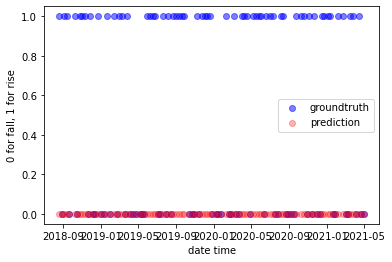

In [19]:
Y_pred_re = Y_pred[:,kind]
Y_pred_re[Y_pred_re>0] = 1
Y_pred_re[Y_pred_re<=0] = 0
k = len(Y_pred_re)
series = np.arange(1,k,k//100)

fig = plt.figure()
ax = plt.subplot()
type1 = ax.scatter(index_valid[series], Y_valid[series,kind], alpha=0.5,color='b',label='groundtruth') 
type2 = ax.scatter(index_valid[series], Y_pred_re[series], alpha=0.3,color='r',label='prediction') 
plt.xlabel("date time")
plt.ylabel("0 for fall, 1 for rise")
ax.legend((type1, type2), (u'groundtruth', u'prediction'), loc='best')
plt.show()

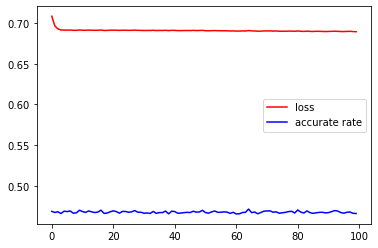

In [20]:
plt.plot(loss_epoch, 'r-', label='loss')
plt.plot(acc_epoch, 'b-', label='accurate rate')
plt.legend(loc='best')
plt.show()

In [21]:
model = LSTMRegression(input_size=240, hidden_size=3, output_size=1)

criterion = torch.nn.BCEWithLogitsLoss()     #交叉熵BCEWithLogitsLoss()和MultiLabelSoftMarginLoss()
#criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.SGD(model.parameters(), lr=1e-1)

epochs = 100
batch_size = 40
batch = X_train.shape[0] // batch_size

torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=batch_size,  # mini batch size
    shuffle=True,  #
    num_workers=2,  # 多线程来读数据
)

loss_epoch = np.zeros(epochs)
acc_epoch = np.zeros(epochs)
for epoch in range(epochs):
    acc_epo = 0
    loss_ep = np.array([])
    acc_ep = np.array([])
    for step,(var_x,var_y) in enumerate(loader):
        out = model(var_x)
        out_f = out.detach().clone().numpy()
        var_yf = var_y.detach().clone().numpy()
        loss = criterion(out, var_y)
        loss_f = loss.detach().clone().numpy()
        acc_ep = np.append(acc_ep,acc(out_f,var_yf))
        loss_ep = np.append(loss_ep,loss_f)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        #print(f'Epoch: {epoch:5d}, Loss: {loss.item():.4e}, Acc:{acc_epo/(X_train.shape[0]*X_train.shape[1]):.4e}')
        print(f'Epoch: {epoch:5d}, Loss: {np.mean(loss_ep):.4e}, ACC: {np.mean(acc_ep):.5e}')
        
    loss_epoch[epoch] = np.mean(loss_ep)
    acc_epoch[epoch] = np.mean(acc_ep)

<ipython-input-21-a368c29abcac>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch_dataset = Data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))


Epoch:     9, Loss: 6.9120e-01, ACC: 4.68052e-01
Epoch:    19, Loss: 6.9084e-01, ACC: 4.67413e-01
Epoch:    29, Loss: 6.9066e-01, ACC: 4.67682e-01
Epoch:    39, Loss: 6.9058e-01, ACC: 4.68254e-01
Epoch:    49, Loss: 6.9046e-01, ACC: 4.67958e-01
Epoch:    59, Loss: 6.9017e-01, ACC: 4.68106e-01
Epoch:    69, Loss: 6.9007e-01, ACC: 4.65772e-01
Epoch:    79, Loss: 6.8947e-01, ACC: 4.66573e-01
Epoch:    89, Loss: 6.8924e-01, ACC: 4.65867e-01
Epoch:    99, Loss: 6.8975e-01, ACC: 4.67736e-01


In [22]:
# test
X_valid = X_valid.reshape(-1,198,240)
#X_valid = torch.from_numpy(X_valid)
Y_pred = model(X_valid)

kind = 3
Y_pred = torch.squeeze(Y_pred,2)
Y_pred = Y_pred.clone().detach().numpy()
pred_acc = acc(Y_pred,Y_valid)

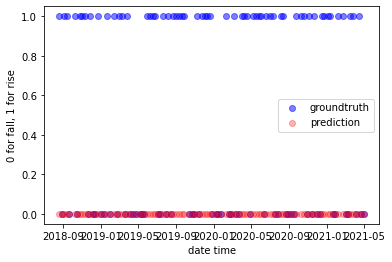

In [23]:
Y_pred_re = Y_pred[:,kind]
Y_pred_re[Y_pred_re>0] = 1
Y_pred_re[Y_pred_re<=0] = 0
k = len(Y_pred_re)
series = np.arange(1,k,k//100)

fig = plt.figure()
ax = plt.subplot()
type1 = ax.scatter(index_valid[series], Y_valid[series,kind], alpha=0.5,color='b',label='groundtruth') 
type2 = ax.scatter(index_valid[series], Y_pred_re[series], alpha=0.3,color='r',label='prediction') 
plt.xlabel("date time")
plt.ylabel("0 for fall, 1 for rise")
ax.legend((type1, type2), (u'groundtruth', u'prediction'), loc='best')
plt.show()

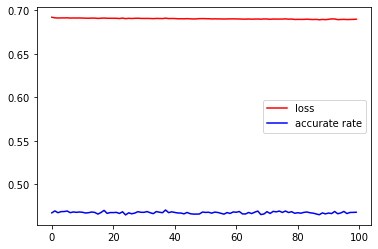

In [24]:
plt.plot(loss_epoch, 'r-', label='loss')
plt.plot(acc_epoch, 'b-', label='accurate rate')
plt.legend(loc='best')
plt.show()